<a href="https://colab.research.google.com/github/ParasCanCode/Image-Classifier/blob/master/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#importing required libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [8]:
#Print the shapes
print("x_train: ",x_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",x_test.shape)
print("y_test: ",y_test.shape)

x_train:  (50000, 32, 32, 3)
y_train:  (50000, 1)
x_test:  (10000, 32, 32, 3)
y_test:  (10000, 1)


In [9]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


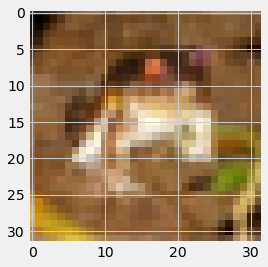

In [10]:
#Show the first image
plt.imshow(x_train[0])

In [23]:
#Show the label for first image
print(y_train[0][0])

6


In [24]:
classification = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

print(classification[y_train[0][0]])


frog


In [26]:
#Convert the labels into the categories

y_train_onehot = to_categorical(y_train)
y_test_onehot = to_categorical(y_test)

In [27]:
print(y_train_onehot[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [28]:
#Normalise the pixel values
x_train = x_train/255
x_test = x_test/255

In [32]:
#Time to build the model and add layers

model = Sequential()

model.add(Conv2D(32,(5,5),input_shape=(32,32,3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(5,5),activation="relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(1000,activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(500,activation="relu"))

model.add(Dropout(0.5))

model.add(Dense(250,activation="relu"))

model.add(Dense(10,activation="softmax"))

In [34]:
#Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [35]:
#Train model
hist = model.fit(x=x_train,y=y_train_onehot,batch_size=256,epochs=10,validation_split=0.2)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 65s 2ms/step - loss: 1.8036 - accuracy: 0.3268 - val_loss: 1.4906 - val_accuracy: 0.4488
Epoch 2/10
40000/40000 [==============================] - 63s 2ms/step - loss: 1.4438 - accuracy: 0.4644 - val_loss: 1.2999 - val_accuracy: 0.5337
Epoch 3/10
40000/40000 [==============================] - 62s 2ms/step - loss: 1.3056 - accuracy: 0.5268 - val_loss: 1.2116 - val_accuracy: 0.5613
Epoch 4/10
40000/40000 [==============================] - 62s 2ms/step - loss: 1.2156 - accuracy: 0.5632 - val_loss: 1.1435 - val_accuracy: 0.5875
Epoch 5/10
40000/40000 [==============================] - 62s 2ms/step - loss: 1.1109 - accuracy: 0.6028 - val_loss: 1.0759 - val_accuracy: 0.6200
Epoch 6/10
40000/40000 [==============================] - 62s 2ms/step - loss: 1.0524 - accuracy: 0.6255 - val_loss: 1.1273 - val_accuracy: 0.5956
Epoch 7/10
40000/40000 [==============================] - 62s 2ms/st

In [37]:
model.evaluate(x_test,y_test_onehot)[1]

10000/10000 [==============================] - 5s 508us/step


0.6625999808311462

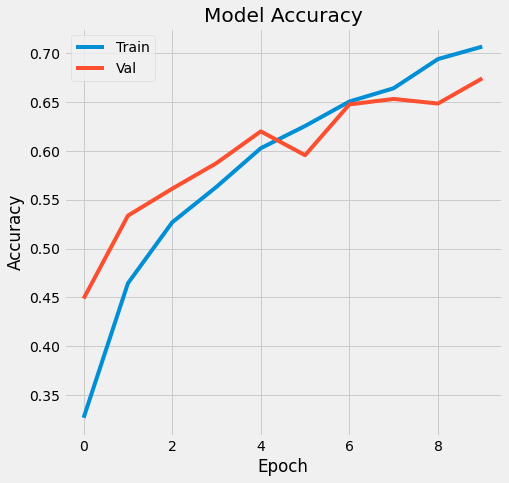

In [40]:
#visualisation of model accuracy
plt.figure(figsize=(7,7))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(['Train','Val'])
plt.show()

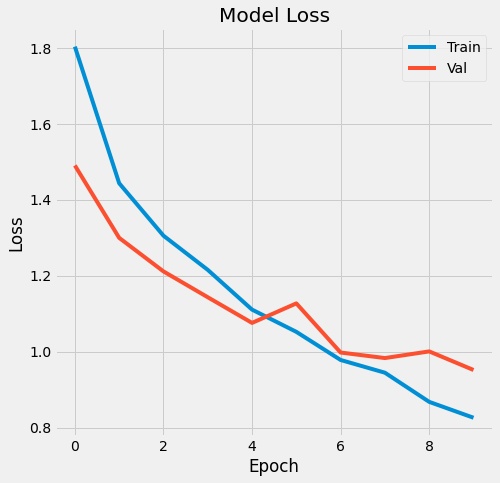

In [42]:
#visualisation of model loss
plt.figure(figsize=(7,7))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['Train','Val'])
plt.show()

In [47]:
from google.colab import files
uploaded = files.upload()


Saving deer.jpg to deer.jpg


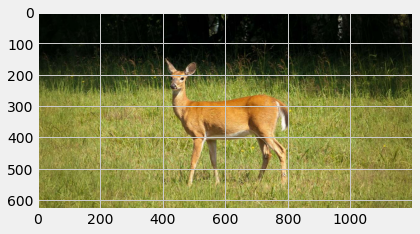

In [48]:
img = plt.imread("deer.jpg")
plt.imshow(img)

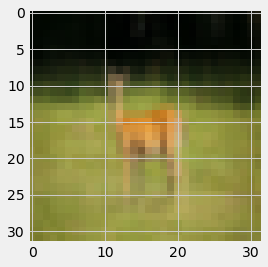

In [50]:
from skimage.transform import resize
newImg = resize(img,(32,32,3))
plt.imshow(newImg)

In [94]:
#type(newImg)
predictions = model.predict(np.array([newImg]))
predictions

array([[9.37035482e-04, 4.70573323e-05, 2.72559300e-02, 6.95325015e-03,
        9.51191902e-01, 6.52595004e-03, 4.37353225e-03, 2.58597615e-03,
        1.05412815e-04, 2.38700195e-05]], dtype=float32)

In [95]:
pred_list = predictions.tolist()[0]
pred_list

[0.0009370354819111526,
 4.7057332267286256e-05,
 0.02725593000650406,
 0.006953250151127577,
 0.9511919021606445,
 0.006525950040668249,
 0.0043735322542488575,
 0.0025859761517494917,
 0.00010541281517362222,
 2.3870019504101947e-05]

In [103]:
dict = {}

for i,x in enumerate(pred_list):
  dict[i] = x

print(dict)

{0: 0.0009370354819111526, 1: 4.7057332267286256e-05, 2: 0.02725593000650406, 3: 0.006953250151127577, 4: 0.9511919021606445, 5: 0.006525950040668249, 6: 0.0043735322542488575, 7: 0.0025859761517494917, 8: 0.00010541281517362222, 9: 2.3870019504101947e-05}


In [112]:
pred_list_sorted = list(dict.values())
pred_list_sorted.sort(reverse=True)
print(pred_list_sorted)

[0.9511919021606445, 0.02725593000650406, 0.006953250151127577, 0.006525950040668249, 0.0043735322542488575, 0.0025859761517494917, 0.0009370354819111526, 0.00010541281517362222, 4.7057332267286256e-05, 2.3870019504101947e-05]


In [121]:
for k,v in dict.items():
  if pred_list_sorted[0] == v:
    res = k

print(res)    

4


In [136]:
print("Predicted {} with an accuracy of {:.2%}".format(classification[res],dict[res]))

Predicted deer with an accuracy of 95.12%
